In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("CRISPR_v7.ipynb")

In [1]:
0.05 * 3.2e9

160000000.0

# CRISPR Lab
### Data Science for Biology
**Notebook developed by:** *Kinsey Long*<br>
**Supervised by:** *Max Staller*<br>

### Learning Outcomes

In this notebook, you will learn about:
* Randomness in Python
* Probability calculations
* Permutation tests and p-values
* Poisson Statistics
* Distributions

---
### Helpful Data Science Resources
Here are some resources you can check out while doing this notebook!

- [Introductory documentation for pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
- [DS4BIO Pandas Guide](pandas_guide.ipynb)
- [GeeksForGeeks Poisson Distribution](https://www.geeksforgeeks.org/poisson-distribution/#)


### Peer Consulting

If you find yourself having trouble with any content in this notebook, Data Peer Consultants are an excellent resource! Click [here](https://dlab.berkeley.edu/training/frontdesk-info) to locate live help.

Peer Consultants are there to answer all data-related questions, whether it be about the content of this notebook, applications of data science in the world, or other data science courses offered at Berkeley.

---

To prepare our notebook environment, run the following cell which imports the necessary packages. It will print `All necessary packages have been imported.` below the cell when it's completed importing.

In [2]:
from datascience import *
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import re
%matplotlib inline
import matplotlib.pyplot as plt
import math

pd.options.mode.chained_assignment = None
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print("All necessary packages have been imported!")

All necessary packages have been imported!


## 1. Restriction Enzyme Cut Sites

The goal of this lab is to use probability theory to understand why CRISPR-Cas9 is such a great tool for genome engineering. To begin, please read [Jennifer Doudna's Nobel Lecture](https://www.nobelprize.org/uploads/2024/03/doudna-lecture.pdf).

We will start with restriction enzymes because they are more simple but the principle of the cut site, but the principle of cut site selection are the same. Restriction enzymes are molecular scissors employed in genetic engineering to precisely cut DNA molecules at specific sequences known as cut sites. These enzymes play a crucial role in various molecular biology techniques, such as DNA cloning, gene editing, and DNA fingerprinting. By recognizing and cleaving specific DNA sequences, restriction enzymes enable scientists to manipulate and study genes with a high degree of precision.

In this lab, we will be exploring the quantity and spacing of restriction enzyme recognition sites across different DNA sequences using statistical methods.

### 1.1 GC Content

In this lab, we will be comparing Ecoli *Saccharomyces cerevisiae* (yeast) and *Homo sapiens* (human) DNA. A reference genome serves as a representative blueprint of a species' genetic material, providing a standardized framework against which individual genomes can be compared and analyzed. These maps are invaluable in deciphering the genetic basis of traits, diseases, and evolutionary relationships. Remember that the reference genome is just one sequence and does not capture population variance. 


First, run the cell below to import the sequences `human_chr21`, `yeast_chr7`, `e_coli_genome` as strings. These contain the full reference DNA sequences for human chromosome 21, yeast chromosome 7, and the whole reference genome of *Escherichia coli* O157:H7 strain respectively. These sequences can be downloaded from NCBI. You can find various data on the human reference genome [here](https://www.ncbi.nlm.nih.gov/datasets/taxonomy/9606/), data on the yeast reference genome [here](https://www.ncbi.nlm.nih.gov/datasets/taxonomy/4932/) and data of the E. coli reference genome [here](https://www.ncbi.nlm.nih.gov/datasets/genome/GCF_000008865.2/).

In [3]:
#Just run this cell
with open("human_chr21.fasta") as f:
    human_chr21 = f.read().replace("\n", "")

with open("yeast_chr7.fasta") as f:
    yeast_chr7 = f.read().replace("\n", "")

with open("e_coli_genome.fasta") as f:
    e_coli_genome = f.read().replace("\n", "")

print("The first 10 nucleotides of our human DNA are: ", human_chr21[:10])
print("The first 10 nucleotides of our yeast DNA are: ", yeast_chr7[:10])
print("The first 10 nucleotides of our E. coli DNA are: ", e_coli_genome[:10])

print(f"The length of the human chr21 DNA is {len(human_chr21)} nucleotides.")
print(f"The length of the yeast chr7 DNA is {len(yeast_chr7)} nucleotides.")
print(f"The length of the E. coli DNA is {len(e_coli_genome)} nucleotides.")

The first 10 nucleotides of our human DNA are:  NNNNNNNNNN
The first 10 nucleotides of our yeast DNA are:  CCACACCCAC
The first 10 nucleotides of our E. coli DNA are:  AGCTTTTCAT
The length of the human chr21 DNA is 46709983 nucleotides.
The length of the yeast chr7 DNA is 1090940 nucleotides.
The length of the E. coli DNA is 5498578 nucleotides.


Notice that our human DNA contains "N" nucleotides, which indicates that the nucleotide at that position is variable. The sequences are also vastly different in length. In order to conduct our statitical analysis later, let's adjust our strings a little bit.

<font color = #d14d0f>**QUESTION 1**:</font> Set `human_dna` to the first 1,000,000 nucleotides in `human_chr21` that are **not** "N". Set `yeast_dna` to the first 1,000,000 nucleotides in `yeast_chr7` that are **not** "N". Set `e_coli_dna` to the first 1,000,000 nucleotides in `e_coli_genome` that are **not** "N". 

In [4]:
# Replace the first 1000000 in human_chr1 that are not "N"
human_dna = human_chr21.replace("N", "")[:1000000]
yeast_dna = yeast_chr7.replace("N", "")[:1000000]
e_coli_dna = e_coli_genome.replace("N", "")[:1000000]

# Do not change code below this line
print("The first 10 nucleotides of our selected human DNA are: ", human_dna[:10])
print("The first 10 nucleotides of our selected yeast DNA are: ", yeast_dna[:10])
print("The first 10 nucleotides of our selected E. coli DNA are: ", e_coli_dna[:10])
print(f"The length of the selected human DNA is {len(human_dna)} nucleotides.")
print(f"The length of the selected yeast DNA is {len(yeast_dna)} nucleotides.")
print(f"The length of the selected E. coli DNA is {len(e_coli_dna)} nucleotides.")


The first 10 nucleotides of our selected human DNA are:  GATCCACCCG
The first 10 nucleotides of our selected yeast DNA are:  CCACACCCAC
The first 10 nucleotides of our selected E. coli DNA are:  AGCTTTTCAT
The length of the selected human DNA is 1000000 nucleotides.
The length of the selected yeast DNA is 1000000 nucleotides.
The length of the selected E. coli DNA is 1000000 nucleotides.


In [5]:
grader.check("q1")

q1 results: All test cases passed!

<font color = #d14d0f>**QUESTION 2**:</font> Build the function `GC_proportion` which calculates the G and C content combined which we will further refer to GC content of an input DNA sequence as a proportion, **rounded to 3 decimal places**.
> Hint: You can use `string1.count(string2)` to count the number of occurances of `string2` within `string1`.

In [6]:
def GC_proportion(sequence):
    gc_count = sequence.count("G") + sequence.count("C")
    return round(gc_count / len(sequence), 3)

In [7]:
grader.check("q2")

q2 results: All test cases passed!

The cell below creates a dictionary of the three different sequences we have set-up so far.

In [8]:
#Just run this cell
dna_dict = {"Human": human_dna,
            "Yeast": yeast_dna,
            "E. coli": e_coli_dna
            }

In [9]:
#Just run this cell to compare the GC content of the three sequences
gc_df = pd.DataFrame({"GC content": []})

for dna, sequence in dna_dict.items():
    gc_df.loc[dna] = GC_proportion(sequence)

gc_df

,GC content
Human,0.448
Yeast,0.380
E. coli,0.513


<font color = #d14d0f>**QUESTION 3a**:</font> Fill in the code below to generate a random DNA sequence `random_dna` of length 1,000,000 nucleotides that is equal proportion A, T, C, and G. 

In [10]:
# DO NOT CHANGE THIS LINE:
np.random.seed(42)


random_dna = "".join(np.random.choice(["A", "T", "C", "G"], 1000000, p=[0.25, 0.25, 0.25, 0.25]))

#YOUR CODE HERE
print("The first 10 nucleotides of our random DNA are: ", random_dna[:10])

The first 10 nucleotides of our random DNA are:  TGCCAAAGCC


In [11]:
grader.check("q3a")

q3a results: All test cases passed!

<font color = #d14d0f>**QUESTION 3b**:</font> Build a function `generate_random_DNA` which takes in an input `GC_content` as a proportion, and generates a random DNA sequence of length 1,000,000 nucleotides with nucleotide frequencies determined from the input `GC_content`.
> Hint:
> - If you aren't sure how to determine the nucleotide frequencies/probabilities from only the GC content, consider Chargaff's Rules.
> - Ignore the `seed` parameter. It is used to help reproduce random sequences, making it easier to check student's work! You can learn more about it [here.](https://www.geeksforgeeks.org/random-seed-in-python/)

In [12]:

def generate_random_DNA(GC_content, seed):
    np.random.seed(seed) #DO NOT CHANGE THIS LINE!
    #YOUR CODE HERE
    AT_content = 1 - GC_content
    random_dna = "".join(np.random.choice(["A", "T", "C", "G"], 1000000, p=[AT_content/2, AT_content/2, GC_content/2, GC_content/2]))
    return random_dna

In [13]:
grader.check("q3b")

q3b results: All test cases passed!

In [14]:
gc_df

,GC content
Human,0.448
Yeast,0.380
E. coli,0.513


<font color = #d14d0f>**QUESTION 3c**:</font> Use `generate_random_DNA` to generate three random DNA sequences: `random_human`, `random_yeast` and `random_ecoli`. Each sequence should have the same GC content as their real sequence counterparts, shown in `gc_df`. Do not change the `seed`!


In [15]:

random_human = generate_random_DNA(gc_df.iloc[0]['GC content'], 10)
random_yeast = generate_random_DNA(gc_df.iloc[1]['GC content'], 11)
random_ecoli = generate_random_DNA(gc_df.iloc[2]['GC content'], 12)

# Do not change code below this line
print("The first 10 nucleotides of our random human DNA are: ", random_human[:10])
print("The first 10 nucleotides of our random yeast DNA are: ", random_yeast[:10])
print("The first 10 nucleotides of our random E. coli DNA are: ", random_ecoli[:10])

The first 10 nucleotides of our random human DNA are:  CACCTAACAA
The first 10 nucleotides of our random yeast DNA are:  AATCTTATGG
The first 10 nucleotides of our random E. coli DNA are:  ACTCAGGAGA


In [16]:
grader.check("q3c")

q3c results: All test cases passed!

### 1.2 Counting Restriction Enzyme Binding Sites

Now, let's take a look at the recognition sequences of some restriction enzymes. These are the sequences that the restriction enzyme will recognize and bind to, allowing it to make a cut in the DNA. You can find more information on specific restriction enzymes [here](https://enzymefinder.neb.com/#!#nebheader).

In [17]:
#Just run this cell to load our restriction enzymes
restriction_enzymes_df = pd.DataFrame({
    "Enzyme": ["MluCI", "HaeIII", "HpyCH4IV", "MfeI", "EagI-HF®", "ZraI", "BssSI-v2", "PacI", "NotI"],
    "Recognition Sequence": ["AATT", "GGCC", "ACGT", "CAATTG", "CGGCCG", "GACGTC", "CACGAG", "TTAATTAA", "GCGGCCGC"]
})

restriction_enzymes_dict = restriction_enzymes_df.to_dict       #Creates a dictionary equivalent of this DataFrame

restriction_enzymes_df

,Enzyme,Recognition Sequence
0,MluCI,AATT
1,HaeIII,GGCC
2,HpyCH4IV,ACGT
3,MfeI,CAATTG
4,EagI-HF®,CGGCCG
5,ZraI,GACGTC
6,BssSI-v2,CACGAG
7,PacI,TTAATTAA
8,NotI,GCGGCCGC


<font color = #d14d0f>**QUESTION 4a**:</font> Build the function `count_seq` which returns the number of occurances of a binding recognition seq, `target_seq`, in a DNA sequence, `DNA`.

In [18]:
def count_seq(DNA, target_seq):
    return DNA.count(target_seq)

In [19]:
grader.check("q4a")

q4a results: All test cases passed!

<font color = #d14d0f>**QUESTION 4b**:</font> Build the function `theoretical_count` which returns the expectation value for the number of occurances of a binding recognition seq, `target_seq`, in a DNA sequence with `DNA_length` number of nucleotides. Ensure that it outputs a whole number. Assume that each DNA nucleotide is equally likely to be observed.
> Guiding questions:
> - What is the probability of observing a target sequence at the start of the DNA sequence? 
> - What about at the second position of the DNA sequence?
> - How many different locations is it possible to observe a match?
> - How does this affect the expected number of occurances?

In [20]:
def theoretical_count(DNA_length, target_seq):
    match_probability =  (1/4) ** len(target_seq)
    expected_num_matches = match_probability * (DNA_length - len(target_seq) + 1)
    return int(expected_num_matches)

In [21]:
theoretical_count(np.random.choice(range(10, 1000000), 1)[0], 'ACGTA')

709

In [22]:
grader.check("q4b")

q4b results: All test cases passed!

<font color = #d14d0f>**QUESTION 4c**:</font> Create a new DataFrame, `re_frequencies` with the following columns, in order: 
- `"Enzyme"`: str, the name of the restriction enzyme.
- `"Recognition Sequence"`: str, the binding recognition sequence for the enzyme.
- `"Expected Count"`: int, the expected value of observing the recognition sequence in a random DNA sequence of length 1,000,000.
- `"Actual Count Human"`: int, the actual number of recognitition sequence matches in `human_dna`.
- `"Actual Count Yeast"`: int, the actual number of recognitition sequence matches in `yeast_dna`.
- `"Actual Count E. coli"`: int, the actual number of recognitition sequence matches in `e_coli_dna`.
- `"Actual Count Random"`: int, the actual number of recognitition sequence matches in `random_dna`.

In [23]:
expected_counts = []
actual_counts_human = []
actual_counts_yeast = []
actual_counts_e_coli = []
actual_counts_random = []

for target_seq in restriction_enzymes_df["Recognition Sequence"]:
    expected_counts.append(theoretical_count(1000000, target_seq))
    actual_counts_human.append(count_seq(human_dna, target_seq))
    actual_counts_yeast.append(count_seq(yeast_dna, target_seq))
    actual_counts_e_coli.append(count_seq(e_coli_dna, target_seq))
    actual_counts_random.append(count_seq(random_dna, target_seq))

re_frequencies = restriction_enzymes_df.copy()
re_frequencies["Expected Count"] = expected_counts
re_frequencies["Actual Count Human"] = actual_counts_human
re_frequencies["Actual Count Yeast"] = actual_counts_yeast
re_frequencies["Actual Count E. coli"] = actual_counts_e_coli
re_frequencies["Actual Count Random"] = actual_counts_random


In [24]:
re_frequencies

,Enzyme,Recognition Sequence,Expected Count,Actual Count Human,Actual Count Yeast,Actual Count E. coli,Actual Count Random
0,MluCI,AATT,3906,5645,9375,4147,3934
1,HaeIII,GGCC,3906,4647,1535,2804,3871
2,HpyCH4IV,ACGT,3906,972,2458,3065,3823
3,MfeI,CAATTG,244,182,520,193,259
4,EagI-HF®,CGGCCG,244,78,34,55,227
5,ZraI,GACGTC,244,61,101,136,237
6,BssSI-v2,CACGAG,244,71,89,57,263
7,PacI,TTAATTAA,15,21,35,26,19
8,NotI,GCGGCCGC,15,6,4,4,12


In [25]:
grader.check("q4c")

q4c results: All test cases passed!

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 4d**:</font> Compare the expected count and actual counts for each DNA sequence.

**ANSWER:**

When I compare the expected and actual counts across different organism, we see notable deviations. MluCI and HaeIII have significantly higher actual counts than expected in humans, while HpyCH4IV is much lower than expected in humans but closer in other species. MfeI appears much more frequently in yeast, whereas EagI-HF®, ZraI, and BssSI-v2 are consistently lower than expected across all organisms. PacI is slightly more abundant than expected, while NotI is significantly underrepresented in all cases. These variations suggest that DNA sequence composition differs across species, possibly due to evolutionary or functional constraints.

### 1.3 Accounting for GC Bias

One explanation for the observed results above is that we assumed the DNA nucleotide frequencies were equal in our expectation value calculation. This may not be the case for human and yeast DNA. Therefore, it may be useful to account for bias in nucleotide frequency in our theoretical count function.

<font color = #d14d0f>**QUESTION 5a**:</font> Build the function `theoretical_count_with_GC` which returns the expectation value for the number of occurances of a binding recognition seq, `target_seq`, in a DNA sequence with `DNA_length` number of nucleotides, incorporating DNA nucleotide frequency information from the `DNA_GC_proportion` of the input DNA. Ensure that it outputs a whole number. 
> Hint: <br>
> - What is the probability of observing the sequence "ATCG" if the probability of each nucleotide is different?
> - If you aren't sure how to determine the nucleotide frequencies/probabilities from only the GC content, consider Chargaff's Rules.

In [26]:
def theoretical_count_with_GC(DNA_length, target_seq, DNA_GC_proportion):
    at_count_of_target, cg_count_of_target = target_seq.count("A") + target_seq.count("T"), target_seq.count("C") + target_seq.count("G")
    DNA_AT_proportion = 1 - DNA_GC_proportion
    match_probability = ((DNA_AT_proportion/2) ** (at_count_of_target/2)) * ((DNA_GC_proportion/2) ** (cg_count_of_target/2)) * ((DNA_AT_proportion/2) ** (at_count_of_target/2)) * ((DNA_GC_proportion/2) ** (cg_count_of_target/2))
    expected_num_matches = match_probability * DNA_length
    return round(expected_num_matches, 0)

In [27]:
grader.check("q5a")

q5a results: All test cases passed!

<font color = #d14d0f>**QUESTION 5b**:</font> Create a new DataFrame, `re_frequencies_GC` with the following columns, in order: 
- `"Enzyme"`: str, the name of the restriction enzyme.
- `"Recognition Sequence"`: str, the binding recognition sequence for the enzyme.
- `"Expected Count Human"`: int, the expected value of observing the recognition sequence in `human_DNA`.
- `"Actual Count Human"`: int, the actual number of recognitition sequence matches in `human_dna`.
- `"Expected Count Yeast"`: int, the expected value of observing the recognition sequence in `yeast_DNA`.
- `"Actual Count Yeast"`: int, the actual number of recognitition sequence matches in `yeast_dna`.
- `"Expected Count E. coli"`: int, the expected value of observing the recognition sequence in `e_coli_DNA`.
- `"Actual Count E. coli"`: int, the actual number of recognitition sequence matches in `e_coli_DNA`.

In [28]:
expected_counts_GC_human = []
expected_counts_GC_yeast = []
expected_counts_GC_e_coli = []

for target_seq in restriction_enzymes_df["Recognition Sequence"]:
    expected_counts_GC_human.append(theoretical_count_with_GC(1000000, target_seq, gc_df.iloc[0]['GC content']))
    expected_counts_GC_yeast.append(theoretical_count_with_GC(1000000, target_seq, gc_df.iloc[1]['GC content']))
    expected_counts_GC_e_coli.append(theoretical_count_with_GC(1000000, target_seq, gc_df.iloc[2]['GC content']))

re_frequencies_GC = restriction_enzymes_df.copy()
re_frequencies_GC["Expected Count Human"] = expected_counts_GC_human
re_frequencies_GC["Actual Count Human"] = actual_counts_human
re_frequencies_GC["Expected Count Yeast"] = expected_counts_GC_yeast
re_frequencies_GC["Actual Count Yeast"] = actual_counts_yeast
re_frequencies_GC["Expected Count E. coli"] = expected_counts_GC_e_coli
re_frequencies_GC["Actual Count E. coli"] = actual_counts_e_coli

re_frequencies_GC

,Enzyme,Recognition Sequence,Expected Count Human,Actual Count Human,Expected Count Yeast,Actual Count Yeast,Expected Count E. coli,Actual Count E. coli
0,MluCI,AATT,5803.0,5645,9235.0,9375,3516.0,4147
1,HaeIII,GGCC,2518.0,4647,1303.0,1535,4329.0,2804
2,HpyCH4IV,ACGT,3822.0,972,3469.0,2458,3901.0,3065
3,MfeI,CAATTG,291.0,182,333.0,520,231.0,193
4,EagI-HF®,CGGCCG,126.0,78,47.0,34,285.0,55
5,ZraI,GACGTC,192.0,61,125.0,101,257.0,136
6,BssSI-v2,CACGAG,192.0,71,125.0,89,257.0,57
7,PacI,TTAATTAA,34.0,21,85.0,35,12.0,26
8,NotI,GCGGCCGC,6.0,6,2.0,4,19.0,4


In [29]:
grader.check("q5b")

q5b results: All test cases passed!

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 5d**:</font> Compare the expected count and actual counts for each DNA sequence. In particular, consider the GC content of the recognition sequences and the GC content of the DNA sequences. How do these results compare to the previous DataFrame in Q4c?

**ANSWER:** Relative to our initial attempt, the GC-adjusted model clearly does a better job at capturing biological reality. We see that it adjust expectations based on the actual sequence composition of the genome and just brings that expected output closer to actual counts for most enzymes. 

In particular we saw that in the previous dataframe, the GC-rich seqeunces are generally underrepresented compared to AT-rich ones. In short the GC-adjusted model reduces overestimation of GC-rich sites in AT-rich genomes and vice versa!

### 1.4 Hypothesis Testing

In Question 5, we looked at the expected versus actual number of restriction enzyme recognition enzymes. If we want to statistically determine whether this value is different between real human DNA versus random DNA with the same GC content, we could set up a hypothesis test. In this section, we will explore whether the number of MfeI recognition sites is statistically significant in real human DNA compared to random DNA.

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 6a**:</font> Write a null and alternative hypothesis for our hypothesis test.

**ANSWER:**
- Null hypothesis: The number of Mfel recognition sites in real human DNA is not significantly less than from the number in random DNA with the same GC content
- Alternative hypothesis: The number of Mfel recognition sites in real human DNA is significantly less than the number in random DNA with the same GC content

<font color = #d14d0f>**QUESTION 6b**:</font> Now, we want to simulate results under the null hypothesis. Fill in the code below to generate the array `predicted_counts`, which has the counts of MluCI recognition sites for 250 random DNA sequences with the same GC content and length as `human_DNA`. Your code may take around a minute to run.
> Hint: Use your function from Q3c to generate a random DNA sequence with the appropriate GC content.

In [30]:
MluCI_recognition_sequence = "AATT"

# GC-content of the human DNA
gc_content_human = gc_df.loc["Human"]["GC content"]

predicted_counts = []
for i in range(250):
    random_seq = generate_random_DNA(gc_content_human, i) #DO NOT CHANGE THE SEED, i.
    count_result = count_seq(random_seq, MluCI_recognition_sequence)
    predicted_counts.append(count_result)

In [31]:
grader.check("q6b")

q6b results: All test cases passed!

<font color = #d14d0f>**QUESTION 6c**:</font> Assign `observed_count` to the number of MluCI recognition sequences in `human_DNA`.

In [32]:
observed_count = count_seq(human_dna, MluCI_recognition_sequence)

Text(0.5, 1.0, 'Number of MluCI Binding Sites in Human DNA vs 250 random sequences of same GC content')

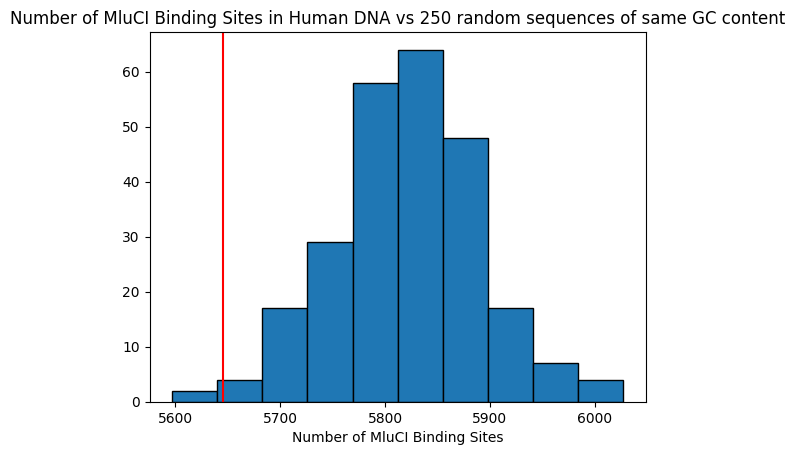

In [33]:
#Just run this cell
plt.hist(predicted_counts, fill=True)
plt.axvline(x = observed_count, color = "red")
plt.xlabel("Number of MluCI Binding Sites")
plt.title("Number of MluCI Binding Sites in Human DNA vs 250 random sequences of same GC content")

In [34]:
grader.check("q6c")

q6c results: All test cases passed!

<font color = #d14d0f>**QUESTION 7a**:</font> Calculate the p-value, comparing `observed_count` to `predicted_counts`, and assign it to `p_value`.

In [35]:

p_value = sum([1 for i in predicted_counts if i <= observed_count]) / len(predicted_counts)

print(f"The p-value for this hypothesis test is {p_value}.")

The p-value for this hypothesis test is 0.012.


In [36]:
grader.check("q7a")

q7a results: All test cases passed!

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 7b**:</font> What can we conclude from our results, given a p-value cutoff of 0.05? What about for a p-value of 0.01?

**ANSWER:** Our results show that there is sigficant statistical evidence at 95% Confidence interval as our p-value $= 0.012 < 0.05$  to reject the null hypothesis. However, at the 99% confidence interval, we accept the null hypothesis!

### 1.4 Poisson Statistics

**The Poisson Probability Distribution** <br>

The Poisson probability distribution is a mathematical concept used to model the probability of a given number of **discrete events** happening in a fixed interval of time or space, under certain conditions. It is particularly useful for **rare events** that occur with a known constant mean rate and independently of the time since the last event. For example, the Poisson distribution can be used to model the number of emails a person receives in an hour or the number of stars appearing in a certain area of the sky. The key parameter of this distribution is λ (lambda), which represents the average number of events in the given interval. The probability of observing exactly k events (where k is a non-negative integer) is calculated using the formula $P(X = k) = (λ^k * e^(-λ)) / k!$. The mean and variance of this distribution are both equal to λ. It is unusual for the mean and variance of a distribution to be the same. Often, this occurs in very high-variance distributions.

Recall that in a Gaussian distribution, the mean and variance are independent parameters. A common point of confusion arises when students try to decide between using the Poisson distribution and the Gaussian (or normal) distribution. While both distributions can be used in certain contexts, they are fundamentally different. The Gaussian distribution is typically used for continuous data and is most appropriate when dealing with large sample sizes or events that are not rare. In contrast, the Poisson distribution is better suited for rare events with smaller sample sizes. However, it's important to note that as the sample size increases (i.e., in the limit of large N), the Poisson distribution can converge to a Gaussian distribution, which is a key point in understanding the relationship between these two statistical models.

--- 

In this section, we will model the probability of observing a given number of PacI recognition sites ("TTAATTAA") in a random 100,000 nucleotides-long DNA sequence using the Poisson distribution, and then using our model to make probabilistic calculations. Therefore, in our scenario, P(X=2) symbolizes the probability of observing 2 MluCI recognition sites in a DNA sequence of length 100,000 with the same GC content as `human_DNA`. 

<font color = #d14d0f>**QUESTION 8a**:</font> Assign `lambda_constant` to the value of λ for a Poisson probability distribution that models the probability of observing a given number of MluCI recognition sites in a random 100,000 nucleotides-long DNA sequence (with the same GC content as a human).
> Hint: you may want to use a function that you previously built.

In [48]:
gc_content_human

0.44800000000000001

In [37]:
lambda_constant = theoretical_count_with_GC(100000, MluCI_recognition_sequence, gc_content_human)

print(f"The lambda for our Poission distribution is {lambda_constant}.")

The lambda for our Poission distribution is 580.0.


<font color = #d14d0f>**QUESTION 8b**:</font> Assign `observed_count_100000` to the number of PacI recognition sites in the first 100,000 nucleotides of `human_DNA`.

In [38]:
# Pacl
Pacl_recognition_sequence = "TTAATTAA"
lambda_constant = theoretical_count_with_GC(100000, Pacl_recognition_sequence, gc_content_human)
lambda_constant

3.0

In [39]:
# Use the Poisson distribution to calculate the probability of observing the observed count
observed_count_100000 = count_seq(human_dna[:100000], "TTAATTAA")

print(f"There are {observed_count_100000} PacI recognition sites in the first 100,000 nucleotides of our real human DNA.")

There are 1 PacI recognition sites in the first 100,000 nucleotides of our real human DNA.


In [40]:
grader.check("q8b")

q8b results: All test cases passed!

<font color = #d14d0f>**QUESTION 8c**:</font> Use the formula for P(X=k) to calculate the probability of observing exactly `observed_count_100000` number of PacI recognition sites in a random DNA (with the same GC content as human). In other words, calculate P(X = `observed_count_100000`). Assign your results to `p_x_observedcount100000`.
> Hint: `math.e` and `math.factorial(int)` may be useful.

In [41]:
p_x_observedcount100000 = stats.poisson.pmf(observed_count_100000, lambda_constant)

print(f"The probability of observed {observed_count_100000} number of PacI binding sites in random DNA of length 100,000 with human GC content is {p_x_observedcount100000}.")

The probability of observed 1 number of PacI binding sites in random DNA of length 100,000 with human GC content is 0.14936120510359183.


In [42]:
grader.check("q8c")

q8c results: All test cases passed!

<font color = #d14d0f>**QUESTION 9a**:</font> Fill in the code below to create a list `pmf` (Probability Mass Function), which contains the probability of observing `k` number of PacI recongition sites in random DNA (with the same GC content as human), for up until `k` = 30. In other words, `pmf` should be a list containing P(X=0), P(X=1), P(X=2), and so on.

In [43]:

k_values = np.arange(0, 31)
pmf = []
for k in k_values:
    p_x_k = stats.poisson.pmf(k, lambda_constant)
    pmf.append(p_x_k)

In [44]:
grader.check("q9a")

q9a results: All test cases passed!

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 9b**:</font> Fill in the code below to generate a `sns` scatterplot of the `pmf` (Probability Mass Function) for values of `k` from 0 to 60 (inclusive). 
> Note: the vertical red line is the number of PacI sites in 100,000 nucleotides of real DNA that you determined in Q8b.

Text(0.5, 1.0, 'Poisson Probability Distribution of Observed k Number of Cut Sites in DNA length 5000')

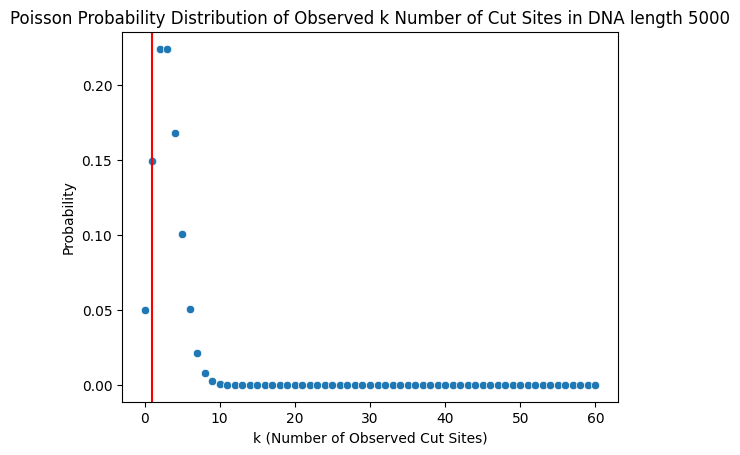

In [45]:
k_values = np.arange(0, 61)
pmf = []
for k in k_values:
    p_x_k = stats.poisson.pmf(k, lambda_constant)
    pmf.append(p_x_k)

ax = sns.scatterplot(x = k_values, y = pmf)

ax.axvline(x = observed_count_100000, color = "red")
ax.set_xlabel("k (Number of Observed Cut Sites)")
ax.set_ylabel("Probability")
ax.set_title("Poisson Probability Distribution of Observed k Number of Cut Sites in DNA length 5000")

In [46]:
grader.check("q9b")

q9b results: All test cases passed!

<font color = #d14d0f>**QUESTION 9c**:</font> Calculate the probability of observing at least 8 PacI cut sites. Assign your result to `p_x_atleast8`. Round your result to three signifcant figures 
> Note: assume the P(k>30) is negligible for these questions.

In [47]:

p_x_atleast8 = 1 - stats.poisson.cdf(7, lambda_constant)

print(f"The probability of observing at least 8 cut sites is  {p_x_atleast8:.4f}.")

The probability of observing at least 8 cut sites is  0.0119.


In [71]:
grader.check("q9c")

q9c results: All test cases passed!

<font color = #d14d0f>**QUESTION 9d**:</font> Calculate the probability of observing between 5 and 10 (inclusive) PacI cut sites. Assign your result to `p_5_x_10`. Round your result to three signficant figures.

In [49]:

p_5_x_10 = stats.poisson.cdf(10, lambda_constant) - stats.poisson.cdf(4, lambda_constant)

print(f"The probability of observing between 5 and 10 (inclusive) cut sites is {p_5_x_10:.3f}.")

The probability of observing between 5 and 10 (inclusive) cut sites is 0.184.


In [50]:
grader.check("q9d")

q9d results: All test cases passed!

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 10**:</font> Explain whether λ must always be discrete for the Poisson distribution. Could the expected number of a cut sites be 1.5? Is it possible to observe 1.5 cut sites? Why?

**ANSWER:** No the $\lambda$ parameter of the Poisson distribution does not have to be discrete, in fact we can choose $\lambda$ to be any non-negative real number and we can also have the continous analog of the poisson known as the exponential distribution. 

So yes, the expexted number of cut sites can be 1.5 which would just mean that on average, across many DNA strands of the same length and composition, you'd expect 1.5 cut sites per sequence. However, as the next question wuuld insinuate, you can't actually observe 1.5 cut sites in a single sequence simply because there is no such thing as a "half-cut"

## 2. Fragment Lengths

In this final section, we will be exploring trends in the fragment lengths between restriction enzyme cut sites in DNA. Throughout this section, we will assume that a cut site is made immediately at the end of a restriction enzyme binding site. Note the cut location can vary between enzymes but make this assumption for simplicity. 

<font color = #d14d0f>**QUESTION 11**:</font> Build a function `fragment_lengths` that takes in a `dna_sequence` and a `cut_site_sequence` and returns a list of lengths of the fragments generated. Choose either approach to yeild results, but only pick 1, and delete the other approach.
> Hint:
> - For example, `fragment_lengths("c", "GGG")` should output a list like [3, 6, 5] (not necessarily in that order). It has three cut sites **after** each "GGG", highlighted: "GGG<mark>|</mark>TTTGGG<mark>|</mark>TTGGG<mark>|</mark>". Your function  calculates the distances between adjacent cut sites which subqeuntly give us fragment lenghts. 
> - Assume cutting goes total completion
> - You do not have to follow the skeleton code if you have a different approach to this answering this question

In [ ]:
#Approach 1
def fragment_lengths(sequence, cut_site):
    site_len = len(cut_site)
    results = [] 
    prev_cut = 0 
    while True:
        # Use the find method to index the next cutting site
        idx = sequence.find(cut_site, prev_cut)
        # If the cutting site is not found, break the loop
        if idx == -1:
            break  
        # Add the lenght of the cut site to the start index value to get the cut position
        cut_position = idx + site_len
        results.append(cut_position - prev_cut)
        prev_cut = cut_position
    if prev_cut < len(sequence):
        # Add the remaining sequence after the last cut
        results.append(len(sequence) - prev_cut) 
    return results

In [52]:
grader.check("q11")

q11 results: All test cases passed!

Just run the cell below to generate plots of the distribution of the fragment lengths for each restriction enzyme. It compares the distribution of the fragment lengths for our real human dna and some random DNA with the same GC content. The cell may take up to a minute to run.

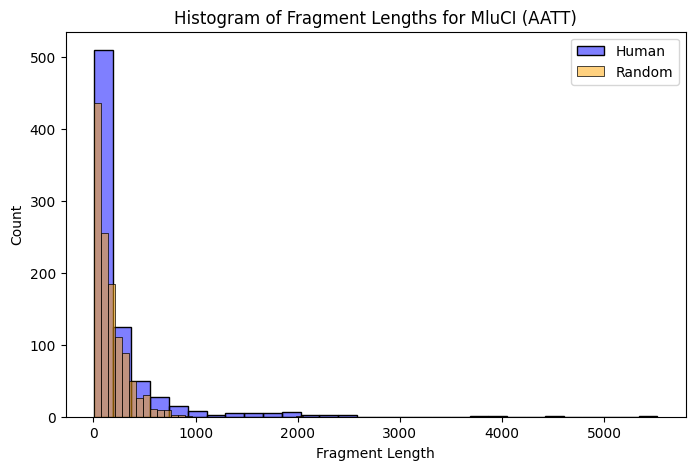

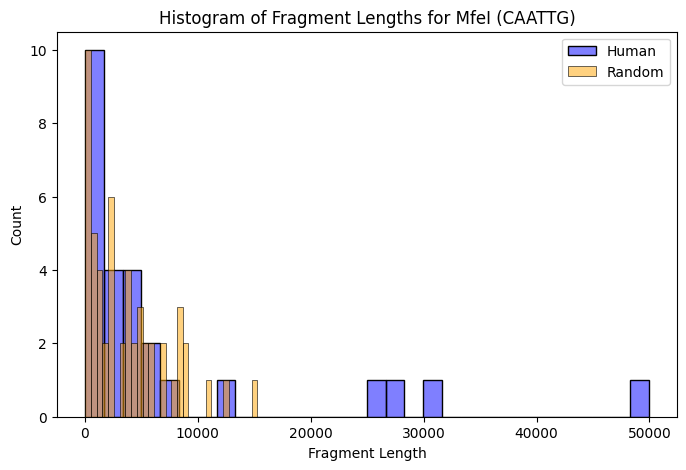

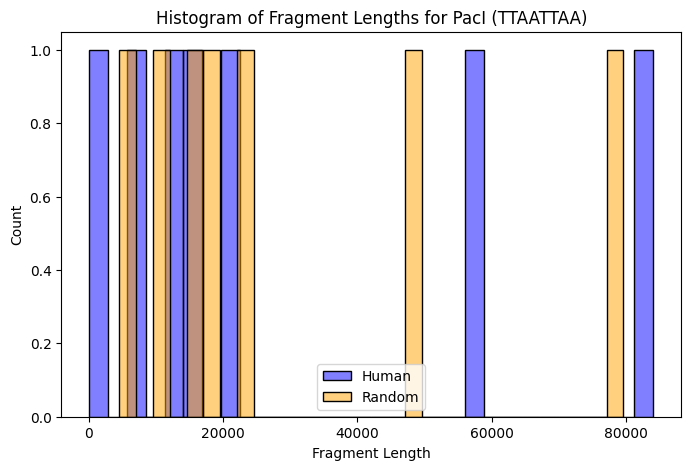

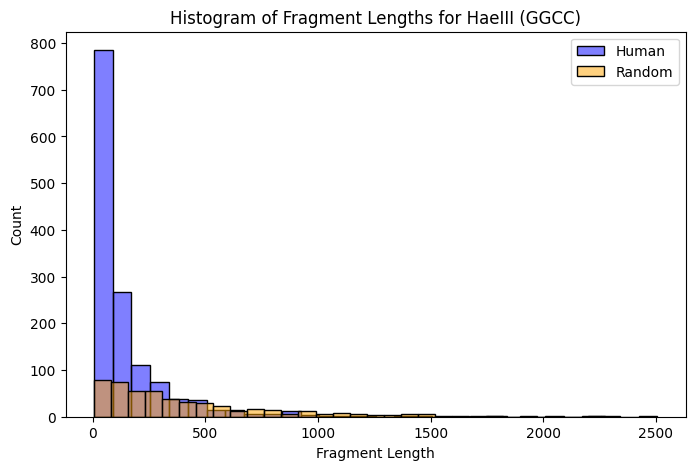

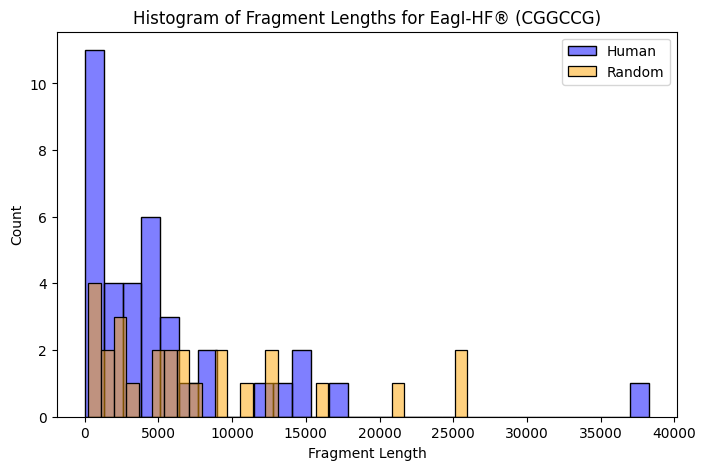

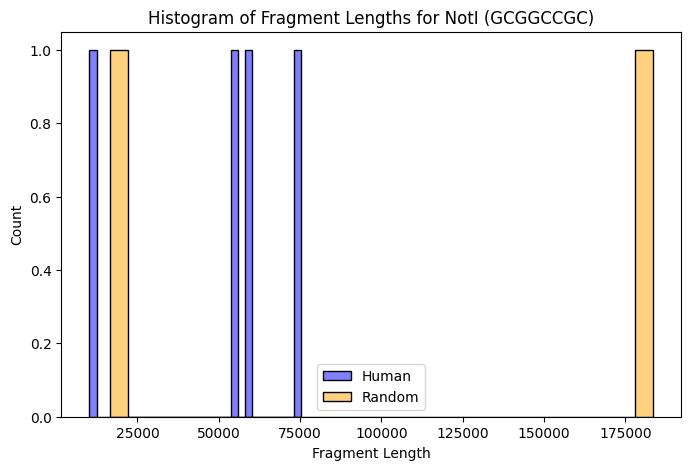

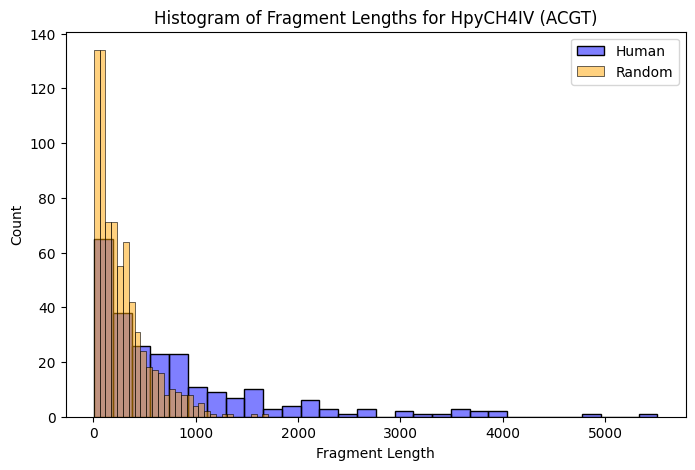

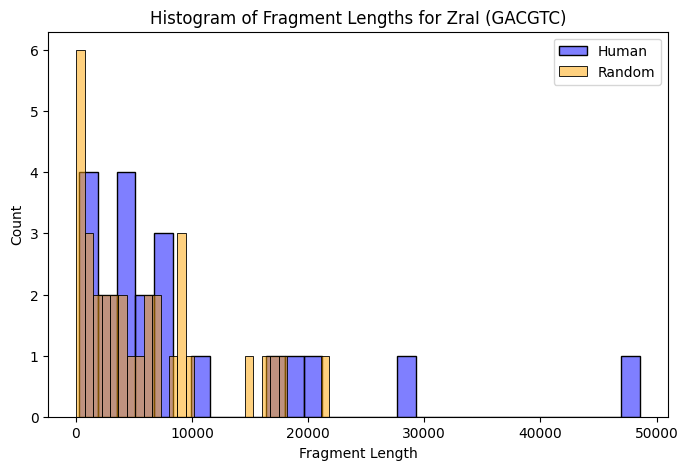

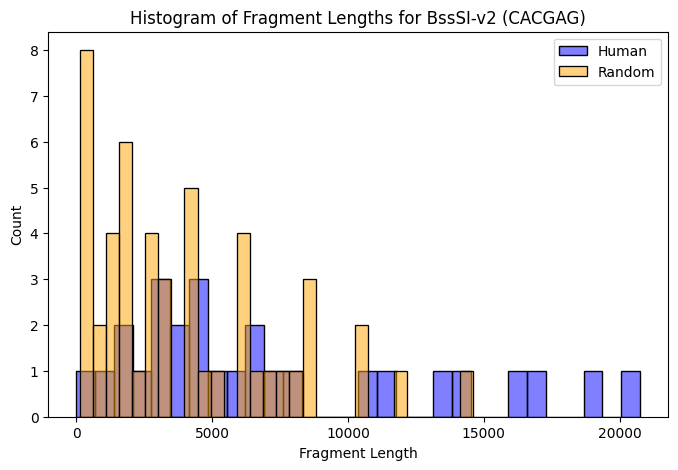

In [53]:
#Just run this cell
enzyme_list = [
    ("MluCI", "AATT"), 
    ("MfeI", "CAATTG"), 
    ("PacI", "TTAATTAA"), 
    ("HaeIII", "GGCC"), 
    ("EagI-HF®", "CGGCCG"), 
    ("NotI", "GCGGCCGC"), 
    ("HpyCH4IV", "ACGT"), 
    ("ZraI", "GACGTC"), 
    ("BssSI-v2", "CACGAG")
]

# Loop through each enzyme and generate a separate plot
for enzyme_name, cut_seq in enzyme_list:
    fragment_lengths_human = fragment_lengths(human_dna[:200000], cut_seq)
    fragment_lengths_random = fragment_lengths(random_human[:200000], cut_seq)

    plt.figure(figsize=(8, 5))
    sns.histplot(fragment_lengths_human, bins=30, alpha=0.5, label="Human", color="blue")
    sns.histplot(fragment_lengths_random, bins=30, alpha=0.5, label="Random", color="orange")

    plt.xlabel("Fragment Length")
    plt.ylabel("Count")
    plt.title(f"Histogram of Fragment Lengths for {enzyme_name} ({cut_seq})")
    plt.legend()
    plt.show()


<!-- BEGIN QUESTION -->

<font color = #d14d0f>**QUESTION 12**:</font> What kinds of different fragment length distributions do you observe in the histograms above? Do any plots show a significantly different distribution from the human versus random DNA? If so, what is a possible biological explanation for those discrepancies?

**ANSWER:** 

**MluCI (AATT):**
Human DNA shows slightly more short fragments than random, suggesting AT-rich regions. This aligns with the abundance of AT-rich repetitive elements (e.g., Alu) in the human genome, leading to more MluCI cut sites.

**HaeIII (GGCC):**
Human DNA shows a stronger peak of short fragments than random, indicating an overrepresentation of GGCC sites. Likely due to GG-rich regions such as CpG islands in promoters.

**HpyCH4IV (ACGT):**
Human DNA shows more long fragments than random, suggesting fewer ACGT cut sites. Likely due to suppression of CG dinucleotides in the human genome (linked to methylation).

**MfeI (CAATTG):**
Human DNA has more long fragments, indicating sparse or clustered MfeI sites. This could reflect regions with conserved functions that avoid disruption from cuts.

**EagI-HF® (CGGCCG):**
More long fragments in human DNA suggest CGGCCG sites are underrepresented. This is likely due to methylation of CpG sequences, which can block recognition.

**ZraI (GACGTC):**
Distributions are similar with some longer fragments in human DNA, suggesting slight underrepresentation of the site. May reflect local sequence bias or methylation.

**BssSI-v2 (CACGAG):**
Slightly longer fragments in human DNA suggest fewer cut sites compared to random. Could be due to GC-bias or avoidance in certain genomic regions.

**PacI (TTAATTAA):**
Both distributions show very long fragments, consistent with the rarity of this long AT-rich recognition sequence. No major difference between human and random DNA.

**NotI (GCGGCCGC):**
Fragment lengths are extremely long, especially in human DNA. Reflects the rarity and methylation of this GC-rich, CpG-dense site in the human genome.

<!-- BEGIN QUESTION -->

**Cas9 Targeting**

CRISPR-Cas9, a revolutionary technology for editing genes, operates in a highly targeted manner. During the Cas9 targeting process, the guide RNA and Cas9 protein complex moves along the DNA strand searching for a binding sequence.

As the CRISPR-Cas9 complex moves along the DNA, it looks for the presence of a Protospacer Adjacent Motif (PAM) sequence. This PAM sequence is crucial because it signals the correct location for gene editing. The Cas9 enzyme from Streptococcus pyogenes, for example, recognizes the PAM sequence 'NGG' (where 'N' can be any nucleotide followed by two guanines).

Once the PAM sequence is identified, the Cas9 protein induces a localized unwinding of the DNA helix. This allows the gRNA to bind or anneal to its complementary DNA sequence adjacent to the PAM. The binding is through standard base-pairing rules (A pairs with T, C pairs with G).

After the gRNA successfully pairs with the target DNA sequence next to the PAM, the Cas9 protein activates its nuclease domains. The gRNA base pairing is 20 bp for actual of 23 match base pairs. These domains then cleave the DNA, typically cutting both strands, leading to a double-strand break at a precise location in the genome, allowing for gene editing to occur.

You could explore either of these questions using `human_chr21`,`yeast_chr7` and/or `e_coli_genome`. 


<font color = #d14d0f>**QUESTION 13**:</font> These series of questions explore the statistical specificity of gRNA targeting based on sequence length, GC content, and PAM constraints, assessing their impact on target site availability and the precision of CRISPR-Cas9 in different genomes. These questions are open ended, but please show your work to prove your answers

<font color = #d14d0f>**QUESTION 13a**:</font> What is the stastically expected minimum lenght of a gRNA target sequences needed in order to bind to only one site in $10^6$ bp for each species, considering their GC content?
How does this compare to the true length (20+3)?


***Answer***: So we want the expected number of matches in the genome segment of size  $10^6$ for each species to be 1, therefore our match probability will be $\frac{1}{10^6}$. 

If we assume that the bases are equally likely within each pair we get that the probability of:

- $P(\text{A or T}) = \frac{p_{AT}}{2}$ where $p_{AT}$ is the AT proportion
- $P(\text{G or C}) = \frac{p_{GC}}{2}$ where $p_{GC}$ is the GC proportion

So we want to solve for Expected minimum length of gRNA target sequences needed, and let's call this quantity $L$. Thus we can form the following relation:

$$
(\frac{p_{AT}}{2})^{L \cdot p_{AT}} \cdot  (\frac{p_{GC}}{2})^{L \cdot p_{GC}} = \frac{1}{10^6}
$$

and simply solve for $L$ which can be done by taking $\ln$ to both sides of the equation giving us that the expexted min length of a gRNA target $L$ is given by:

$$
L = \frac{\ln{10^{-6}}}{p_{AT} \cdot \ln{\frac{p_{AT}}{2}} + p_{GC} \cdot \ln(\frac{p_{GC}}{2})}
$$

and we calculate pythonically as follows below

In [57]:
def get_min_length(bp, gc_content):
    numerator = -np.log(bp)
    at_content = 1 - gc_content
    denominator = at_content * np.log(0.5 * at_content) + gc_content * np.log(0.5 * gc_content)
    return numerator / denominator

base_pairs = 1e6

human_min_length = get_min_length(base_pairs, gc_content_human)
yeast_min_length = get_min_length(base_pairs, gc_df.loc["Yeast"]["GC content"])
e_coli_min_length = get_min_length(base_pairs, gc_df.loc["E. coli"]["GC content"])

print(f"Computed minimum length for human DNA: {human_min_length:.2f} bp")
print(f"Computed minimum length for yeast DNA: {yeast_min_length:.2f} bp")
print(f"Computed minimum length for E. coli DNA: {e_coli_min_length:.2f} bp")


Computed minimum length for human DNA: 10.00 bp
Computed minimum length for yeast DNA: 10.18 bp
Computed minimum length for E. coli DNA: 9.97 bp


So what this illustrates that while the theoretical minimum length for uniqueness in a small region is around 10 bp, the true CRISPR system employs a much longer sequence to achieve precise targeting in real biological contexts.

<font color = #d14d0f>**QUESTION 13b**:</font>How much does the NGG constraint matter for the number of target sites in the $10^6$ bp for each species?

***Answer***: So without the PAM constraints, every possible region in our $10^6$ bp region could be a target site. But as you'll see in the work below, if we do have this NGG constraint, it narrows the pool of potential target sites dramatically  which ensures that only a subset of sites is eligible for editing

In [59]:
#use this code cell to show your work
human_gc = gc_df.loc["Human"]["GC content"]
yeast_gc = gc_df.loc["Yeast"]["GC content"]
ecoli_gc = gc_df.loc["E. coli"]["GC content"]

bp = 1e6

# now i calculate expected number of valid PAM sites
human_sites = bp * (human_gc/2)**2
yeast_sites = bp * (yeast_gc/2)**2
ecoli_sites = bp * (ecoli_gc/2)**2

print(f"Expected number of valid PAM sites in human DNA: {human_sites:.2f}")
print(f"Expected number of valid PAM sites in yeast DNA: {yeast_sites:.2f}")
print(f"Expected number of valid PAM sites in E. coli DNA: {ecoli_sites:.2f}")

Expected number of valid PAM sites in human DNA: 50176.00
Expected number of valid PAM sites in yeast DNA: 36100.00
Expected number of valid PAM sites in E. coli DNA: 65792.25


So we see how instead of having 1,000,000 positions as target site when we ignore PAM requirements, we see that the above narrows it down a lot!

<font color = #d14d0f>**QUESTION 13c**:</font>How many cut sites to you expect to occur by chance in each whole genome? (Hint genome sizes are: Ecoli: 4.6e6 bp, Yeast: 12.2e6 bp, Human 3.2e9 bp). You can assume GC content from above. Is this ‘good enough’ for precision genome engineering of human cells?

***Answer***: The expected number of cut sites in the whole genome can be found as such:

$$
E(\text{matches}) = N \times P_{\text{match}}
$$

And $P_{\text{match}} = P_{\text{target}} \times P_{PAM}$.

$$
P_{\text{target}} = (\frac{P_{AT}}{2})^{20 \cdot P_{AT}} \times (\frac{P_{GC}}{2})^{20 \cdot P_{GC}} \\
P_{PAM} = (\frac{P_{GC}}{2})^2
$$

Where:

- $N := $ Genome size (bp)
- $P_{\text{target}} := $ probability for the 20-bp target
- $P_{PAM} := $ probability of getting "GG"
- $P_{GC} := $ GC proportion
- $P_{AT} := $ AT Proportion

In [60]:
#use this code cell to show your work
def expected_matches(N, gc_content):
    at_content = 1 - gc_content
    p_target = (at_content/2)**(20 * at_content) + (gc_content/2)**(20 * gc_content)
    p_pam = (gc_content/2)**2
    return N * p_target * p_pam

human_matches = expected_matches(3.2e9, human_gc)
yeast_matches = expected_matches(12.2e6, yeast_gc)
ecoli_matches = expected_matches(4.6e6, ecoli_gc)

print(f"Expected number of Cas9 binding sites in human DNA: {human_matches:.2f}")
print(f"Expected number of Cas9 binding sites in yeast DNA: {yeast_matches:.2f}")
print(f"Expected number of Cas9 binding sites in E. coli DNA: {ecoli_matches:.2f}")

Expected number of Cas9 binding sites in human DNA: 349.99
Expected number of Cas9 binding sites in yeast DNA: 1.67
Expected number of Cas9 binding sites in E. coli DNA: 0.58


## Extra Credit
Most assignments in this course will include optional extra credit questions. These questions are designed as starting points for students to explore more free-form mini projects. Therefore, there is no skeleton code and minimal guidance for these questions. Students are welcome to go beyond the scope of the question or adapt the question as necessary to answer their own scientific questions of interest. You are welcome to create as many coding cells as you would like for these mini-projects. In order to get extra credit, students should make a reasonable attempt (as judged by the grader) on at least one question and write a brief report.

Write a summary on your methodology and your findings, highlighting key results and any interesting observations. The length of the report does not matter, as long as it answers all of the following questions:
- What was your scientific goal with this project?
- What methods did you use and why?
- What were the key results you found for each method you implemented?
- Were there any limitations in your methods?
- What additional observations or comments can you make on your findings? What is the greater biological relevance or implication?
- Are there any additional questions you would want to explore?

<font color = #d14d0f>**EC Mini-Project A:**</font> There is a major patent dispute between UC Berkeley and the Broad Institute. Learn about this dispute and write 500 essay summarizing the current state of the litigation.


<font color = #d14d0f>**EC Mini-Project B:**</font> Eric Lander, the director of the Broad Institute, wrote a high profile review article chronicling the early history of CRISPR during the patent litigation. How might this article have influenced the patent litigation? Do you see any discrepancies between this article and the history published by the Nobel committee? Do you notice any biases? Do you feel any potential conflicts of interest were adequately disclosed? https://www.cell.com/fulltext/S0092-8674%2815%2901705-5
vs
https://www.nobelprize.org/uploads/2020/10/popular-chemistryprize2020.pdf

<font color = #d14d0f>**EC Mini-Project C:**</font> While Cas9 based CRISPR is currently the most popular tool for modifying genomes, other technologies existed before CRISPR, like TALENs and Zinc finger nucleases. Research one of these alternative methods for genome engineering and write a short paragraph comparing and contrasting that method with CRISPR. What are the advantages of each method? What are the disadvantages? This question is intended as an open ended exploration. You may want to investigate gene therapy dimensions and AAV delivery systems, or explore immunogenicity, describe genome target specificity, or describe ease of reagent validation. Please limit your answer to 500 words discussing one or a few contrasts. After exploring the strengths and weaknesses of these different technologies with the members of your group, what is your favorite method? Why?

<font color = #d14d0f>**EC Mini-Project D:**</font> How many unique cut sites can you target in each of your 10^6 bp regions? 

In [ ]:
#YOUR CODE HERE. ADD ADDITIONAL CODE CELLS AS NEEDED.

**EXTRA CREDIT REPORT: [insert project choice here]** <br>

*DOUBLE-CLICK TO EDIT THIS CELL AND TYPE YOUR REPORT*

---
### Congratulations! You have finished CRISPR Lab!
---

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Save, then download the zip file and submit it to the Gradescope autograder assignment. Then, extract the written solutions PDF and upload to the written work lab assignment.

In [61]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

[WARNING] Could not parse YAML metadata at line 6 column 1: not an object


Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1 results: All test cases passed!

    q2 results: All test cases passed!

    q3a results: All test cases passed!

    q3b results: All test cases passed!

    q3c results: All test cases passed!

    q4a results: All test cases passed!

    q4b results: All test cases passed!

    q4c results: All test cases passed!

    q5a results: All test cases passed!

    q5b results: All test cases passed!

    q6b results: All test cases passed!

    q6c results: All test cases passed!

    q7a results: All test cases passed!

    q8b results: All test cases passed!

    q8c results: All test cases passed!

    q9a results: All test cases passed!

    q9b results: All test cases passed!

    q9c results: All test cases passed!

    q9d results: All test cases passed!

    q11 results: All test cases passed!
